# Passive Hopper(Ground)

In [5]:
import os
# Get current working directory
cwd = os.getcwd()

# Only go up one level if we’re currently inside 'notebooks'
if cwd.endswith("notebooks"):
    os.chdir("..")
print("Current working directory:", os.getcwd())

Current working directory: /Users/jerrywumacmini/Desktop/hopper_sim


In [10]:
import yaml

with open("cfg/passive_hopper.yaml", "r") as f:
    cfg = yaml.safe_load(f)

m_b = cfg["body_mass"]
m_l = cfg["leg_mass"]
l0 = cfg["spring_length"]
k = cfg["spring_constant"]
g = cfg["gravity"]
x0 = cfg["x0"]

In [11]:
print(f"Body mass: {m_b}, Leg mass: {m_l}, Spring length: {l0}, Spring constant: {k}, Gravity: {g}, Initial state: {x0}")

Body mass: 1, Leg mass: 0.2, Spring length: 0.3, Spring constant: 800, Gravity: 9.81, Initial state: [0.5, 0.0, 0.0, 0.0]


## One States State Machine (Stance)

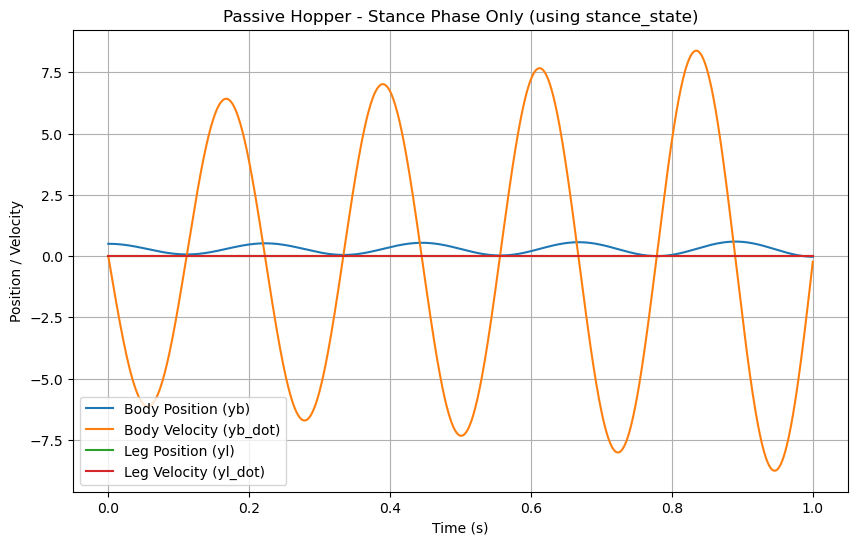

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from dynamics.passive_hopper import stance_state

# --- Simulation parameters ---
dt = 0.001
t_max = 1.0
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)

# --- Initial state ---
x = np.zeros((steps, 4))
x[0] = x0  # [x_b, x_b_dot, x_l, x_l_dot]
if x[0,2] != 0:
    x[0, 2] = 0
    print("Set Leg Position to Ground(0) for Stance State Simulation")

# --- Simulation loop ---
for i in range(1, steps):
    x_dot = stance_state(x[i-1], k, l0, m_b, m_l, g)
    x[i] = x[i-1] + x_dot * dt

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(t, x[:, 0], label="Body Position (yb)")
plt.plot(t, x[:, 1], label="Body Velocity (yb_dot)")
plt.plot(t, x[:, 2], label="Leg Position (yl)")
plt.plot(t, x[:, 3], label="Leg Velocity (yl_dot)")
plt.xlabel("Time (s)")
plt.ylabel("Position / Velocity")
plt.title("Passive Hopper - Stance Phase Only (using stance_state)")
plt.legend()
plt.grid(True)
plt.show()


## Two States State Machine

In [ ]:
import numpy as np
from dynamics.passive_hopper import flight_state, stance_state

# --- Simulation ---
dt = 0.001
t_max = 1.0
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)

# initial state
x = np.zeros((steps, 4))
x[0] = x0

if x0[2] > 0:
    state = "flight"
else:
    state = "stance"

print(f"Initial state: {state}")

for i in range(1, steps):
    if state == "flight":
        x_dot = flight_state(x[i-1], k, l0, m_b, m_l, g)
        x[i] = x[i-1] + x_dot * dt
        if x[i][2] <= 0:
            state = "stance"
            x[i][2] = 0
            x[i][3] = 0  # ensure leg position is at ground level
    elif state == "stance":
        x_dot = stance_state(x[i-1], k, l0, m_b, m_l, g)
        x[i] = x[i-1] + x_dot * dt
        if x[i][2] > 0 and x[i][3] > 0:
            state = "flight"

# --- Plotting ---
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, x[:, 0], label='Body Position (yb)')
ax.plot(t, x[:, 1], label='Body Acceleration (yb_dot)')
ax.plot(t, x[:, 2], label='Leg Position (yl)')
ax.plot(t, x[:, 3], label='Leg Acceleration (yl_dot)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (m)')
ax.set_title('Passive Hopper Simulation')
ax.legend()
ax.grid(True)

plt.show()